# Working with Time Series

# A. Dates and Times in Python

### A.1. Native Python Dates and Times: `datetime` and `dateutil`

In [1]:
from datetime import datetime
datetime(year=2021, month=7, day=4)

datetime.datetime(2021, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2021")
date

datetime.datetime(2021, 7, 4, 0, 0)

In [3]:
date.strftime('%A')

'Sunday'

### A.2. Typed Arrays of Times: NumPy's `datetime64`

* NumPy’s `datetime64` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented compactly and operated on in an efficient manner.

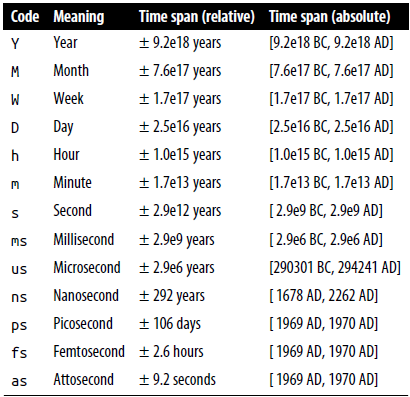

In [4]:
import numpy as np
date = np.array('2021-07-05', dtype=np.datetime64)
date

array('2021-07-05', dtype='datetime64[D]')

In [5]:
date + np.arange(12)

array(['2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
       '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12',
       '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16'],
      dtype='datetime64[D]')

In [6]:
np.datetime64('2021-07-04')

numpy.datetime64('2021-07-04')

In [7]:
np.datetime64('2021-07-04 12:00')

numpy.datetime64('2021-07-04T12:00')

In [8]:
np.datetime64('2021-07-04 12:59:59.50', 'ns')

numpy.datetime64('2021-07-04T12:59:59.500000000')

### A.3. Dates and Times in Pandas

* `Timestamp` object:
    * combines the ease of use of `datetime` and `dateutil` with the efficient storage and vectorized interface of `numpy.datetime64`.

* `DatetimeIndex` :
    * used to index data in a Series or DataFrame.
    * from a group of Timestamp objects.

In [9]:
import pandas as pd

In [10]:
date = pd.to_datetime("4th of July, 2021")
date

Timestamp('2021-07-04 00:00:00')

In [11]:
date.strftime('%A')

'Sunday'

In [12]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', freq=None)

# B. Pandas Time Series: Indexing by Time

In [13]:
index = pd.DatetimeIndex(['2020-07-04', '2020-08-04', '2021-07-04', '2021-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2020-07-04    0
2020-08-04    1
2021-07-04    2
2021-08-04    3
dtype: int64

In [14]:
data['2020-07-04':'2021-07-04']

2020-07-04    0
2020-08-04    1
2021-07-04    2
dtype: int64

In [15]:
data['2021']

2021-07-04    2
2021-08-04    3
dtype: int64

# C. Pandas Time Series Data Structures

* Timestamps:
    * `Timestamp` type:
        * This is essentially a replacement for Python’s native `datetime`, but it’s based on the more efficient `numpy.datetime64` data type.
    * `DatetimeIndex` type:
        * Associated `Index` structure

* Time Periods:
    * `Period` type:
        * Encodes a fixed-frequency interval based on `numpy.datetime64`.
    * `PeriodIndex` type:
        * Associated `Index` structure

* Time Deltas or Durations:
    * `Timedelta` type:
        * More efficient replacement for Python's native `datetime.timedelta` and is based on `numpy.timedelta64`
    * `TimedeltaIndex` type:
        * Associated `Index` structure

In [16]:
dates = pd.to_datetime([datetime(2021, 7, 3), '4th of July, 2021', '2021-Jul-6', '07-07-2021', '20210708'])
dates

DatetimeIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)

In [17]:
dates.to_period('D')

PeriodIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
             '2021-07-08'],
            dtype='period[D]')

In [18]:
dates -dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

# D. Regular Sequences: `pd.date_range`

* `pd.date_range` for timestamps
* `pd.period_range` for periods
* `pd.timedelta_range` for time deltas

In [19]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [21]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [22]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [23]:
pd.timedelta_range(0, periods=6, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00'],
               dtype='timedelta64[ns]', freq='H')

# E. Frequencies and Offsets

* Listing of Pandas frequency codes:
    * 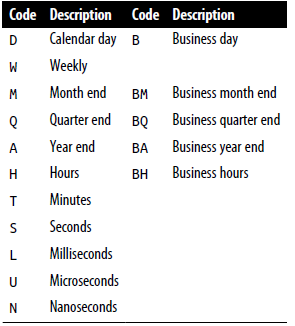

* Listing of start-indexed frequency codes
    * 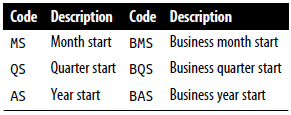
    * Addionally, you change the month used to mark any quarterly or annual code by adding a 3-letter month code as suffix:
        * `Q-JAN`, `BQ-FEB`, `QS-MAR`, etc.

    * In the same way, the split point of the weekly frequency can be modified by adding a 3-letter weekday code: `W-SUN`, `W-MON`, `W-TUE`, etc.

In [24]:
# Frequency of 2 hours and 30 minutes
pd.timedelta_range(0, periods=6, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00'],
               dtype='timedelta64[ns]', freq='150T')

In [25]:
from pandas.tseries.offsets import BDay

pd.date_range('2015-07-01', periods=6, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08'],
              dtype='datetime64[ns]', freq='B')

# F. Resampling, Shifting, and Windowing